# Introduction

## Start by introducing the idea of supervised learning and describe what the point of using these models is.

### Supervised Learning

Machine learning techniques like supervised learning use labeled data to train a model before applying it to new, unlabeled data to generate predictions or categorize it. The objective of supervised learning is to create a model that can correctly predict or categorize new data using patterns discovered from previously labeled data.

The "Bank Marketing" dataset from the UCI Machine Learning Repository will be used for this project. This dataset includes details on a Portuguese bank's marketing efforts, including a range of attributes such client demographics, account information, and contact information. The Target Variable is whether the person took the term deposit or not.


## You should then discuss the dataset you’ll be using (including where you found it) and the goals/question you want to answer with your supervised learning models.

### Input variables:
##### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone') 
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). **Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**
##### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)


https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The target variable for this dataset is whether the client has subscribed to a term deposit or not, represented by the "y" column. This is a binary variable with two possible values: "yes" or "no".

I specifically want to respond to these queries:

- Based on a customer's demographics, account details, and contact history, can we properly forecast if they would sign up for a term deposit?
- Which supervised learning model in this dataset is best at predicting whether a consumer will sign up for a term deposit?


# Splitting the Data, Metrics, and Models

### This section should start with a discussion of model metrics and describing two metrics you’ll be using to judge your models. You should discuss why you are using the metrics and what their advantages/disadvantages may be.

Metrics for measuring a model's performance are known as model metrics. Accuracy and F1 score are two measures that will be used to evaluate the models.

- Accuracy : Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

    Accuracy = $\frac{Number \hspace{0.1cm} of \hspace{0.1cm} Correct \hspace{0.1cm}Predictions}{Total \hspace{0.1cm}Number\hspace{0.1cm} of\hspace{0.1cm} Predictions}$

    For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:
    
    Accuracy = $\frac{TP \hspace{0.1cm} + \hspace{0.1cm} TN }{TP \hspace{0.1cm}+\hspace{0.1cm} FP\hspace{0.1cm} +\hspace{0.1cm}TN \hspace{0.1cm} + \hspace{0.1cm}FN}$


    Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.
    
    https://developers.google.com/machine-learning/crash-course/classification/accuracy
    
    Accuracy is a good metric when the dataset is balanced, when the number of observations in each class is approximately equal. However, when the dataset is imbalanced, accuracy can be a misleading metric, as the model can predict all to be true or all to be false and still get a good accuracy score.
    
- F1 Score : F1 score is a harmonic mean of precision and recall. Precision is the proportion of true positives to the total number of positive predictions, and recall is the proportion of true positives to the total number of actual positives. F1 score is a better metric than accuracy when the dataset is imbalanced. Since Precision and Recall capture FP and FN respectively, it is able to capture the model performance better even if the data is imbalanced.
    
    F1_Score = $ \frac{2}{\frac{1}{recall} \times \frac{1}{precision}} $



Additionally, I'm also looking at AUC-ROC as well. The AUC ROC, is a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR). The AUC ROC curve plots the TPR (also called sensitivity) on the y-axis and FPR (1-specificity) on the x-axis. The curve shows the model's ability to distinguish between the positive and negative classes. A value of 1 is desirable and equal to 0.5, indicates random split.

### Explain in detail why we want to split our data into training and test sets and split your data.

Splitting the data into train and test sets is a standard practice in the ML model process

- Main reason is to see how the model does on new data. The model would learn from the training data and would try to generalise to test data, based on the metrics, we can then evaluate how the model is performing overall.

- Splitting the data would prevent overfitting. If we apply the model to the entire data, it may end up fitting the model to the bias or the noise in the data rather than generalising. It will do very well to the training data and give out poor results when new data is passed.

- Sometimes we can split into a validation test to tune hyperparameters.

In summary, splitting the data into training, validation, and test sets is important to evaluate the model's performance on new, unseen data, prevent overfitting, and tune the model's hyperparameters.

### You should have subsections that describe the five methods that you’ll be using

#### Logistic Regression with Reguralisation

Logistic regression is a statistical method which uses a logistic function to model the relationship between the independent variables and the probability of the dependent variable taking on a particular value. The logistic function is used since it restricts the values to be under 1 and below 0, which is exactly the bounds that any probability can take. In logistic regression, the output is a probability of being either one of the classes based on the values of the independent variables. Logistic regression can be used to analyze the relationship between a binary outcome and continuous or categorical independent variables.

The Reguralisation comes in when we use a penalty function to minimise the loss function. I will be using ElasticNet, which is a combination of Ridge and Lasso to arrive at the best model. Ridge is when the loss function is penalised with sum of squares of the coefficients, where as Lasso is when the loss funciton is penalised with absolute value of the coefficients.

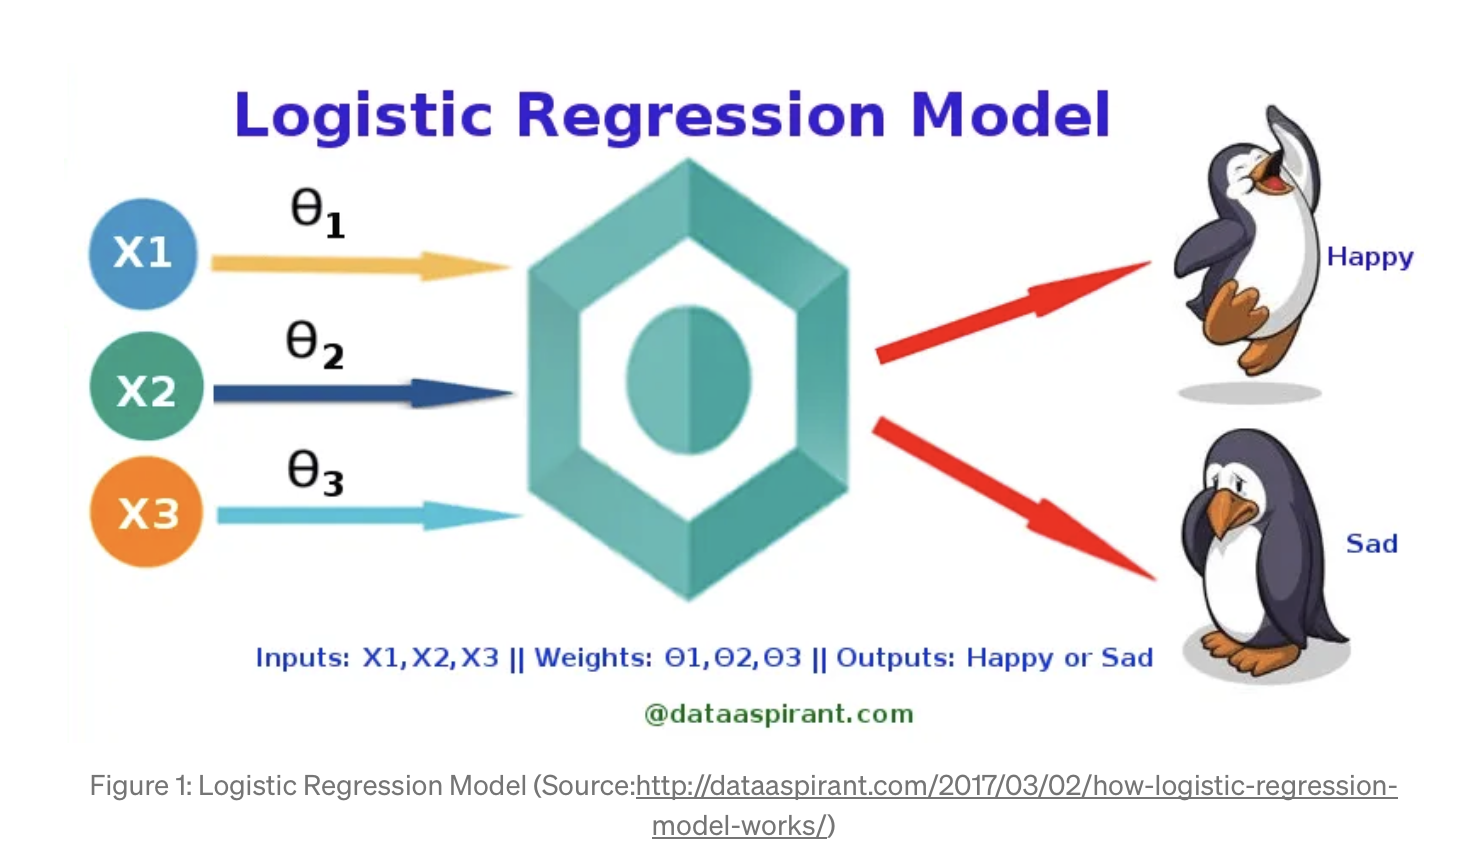

#### Classification Tree

In a classification tree the basic idea is to partition the data into subsets by splitting the data based on the values of the input features. It begins with the entire dataset and selects the best feature to split the data based on some criteria. The dataset is then split into subsets based on the values of the selected feature. This process is repeated recursively for each subset until a stopping criteria is met. The resulting tree structure can be used to predict the class label of new instances by traversing the tree from the root to a leaf node based on the values of the input features. After this the classification is made on the most prevalent class in region as prediction. However the Classification trees are prone to overfitting and in some cases may not generalise well to new data.

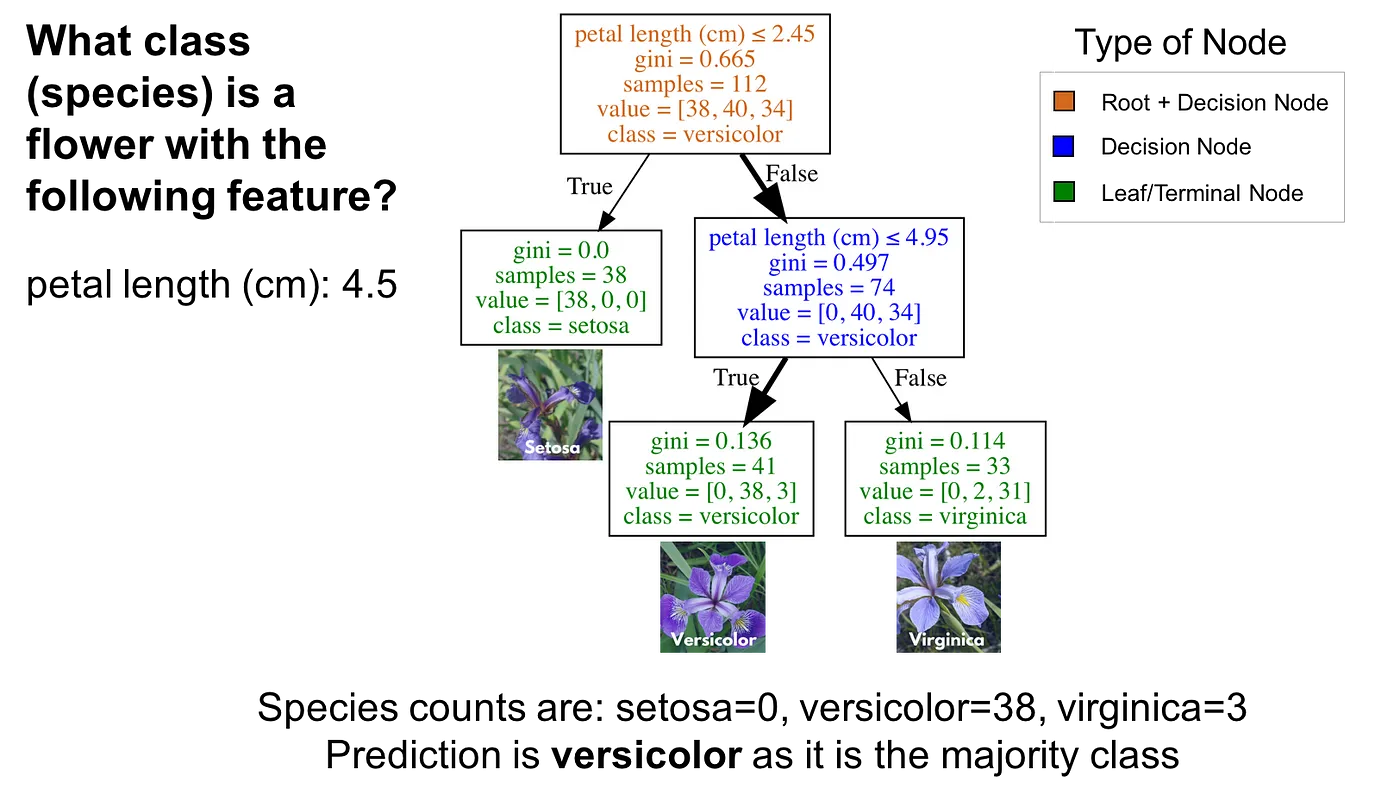

https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

#### Random Forest Classifier

Random Forest Classifier extends the idea of a Decision tree. It is an ensemble learning algorith. Instead of one tree a given number of trees are taken and each tree has varying number of factors, predictor variables, which decide individual outputs, there are chosen randomly. The most prevalent output is then used to make the prediction. Random Forest can improve predicttion but is computationally intensive and also has less interpretability. Random Forest algorithm is able to perform well since it is able to avoid overfitting and redue variance by using Bootstrapping Aggregation and Feature subsampling.

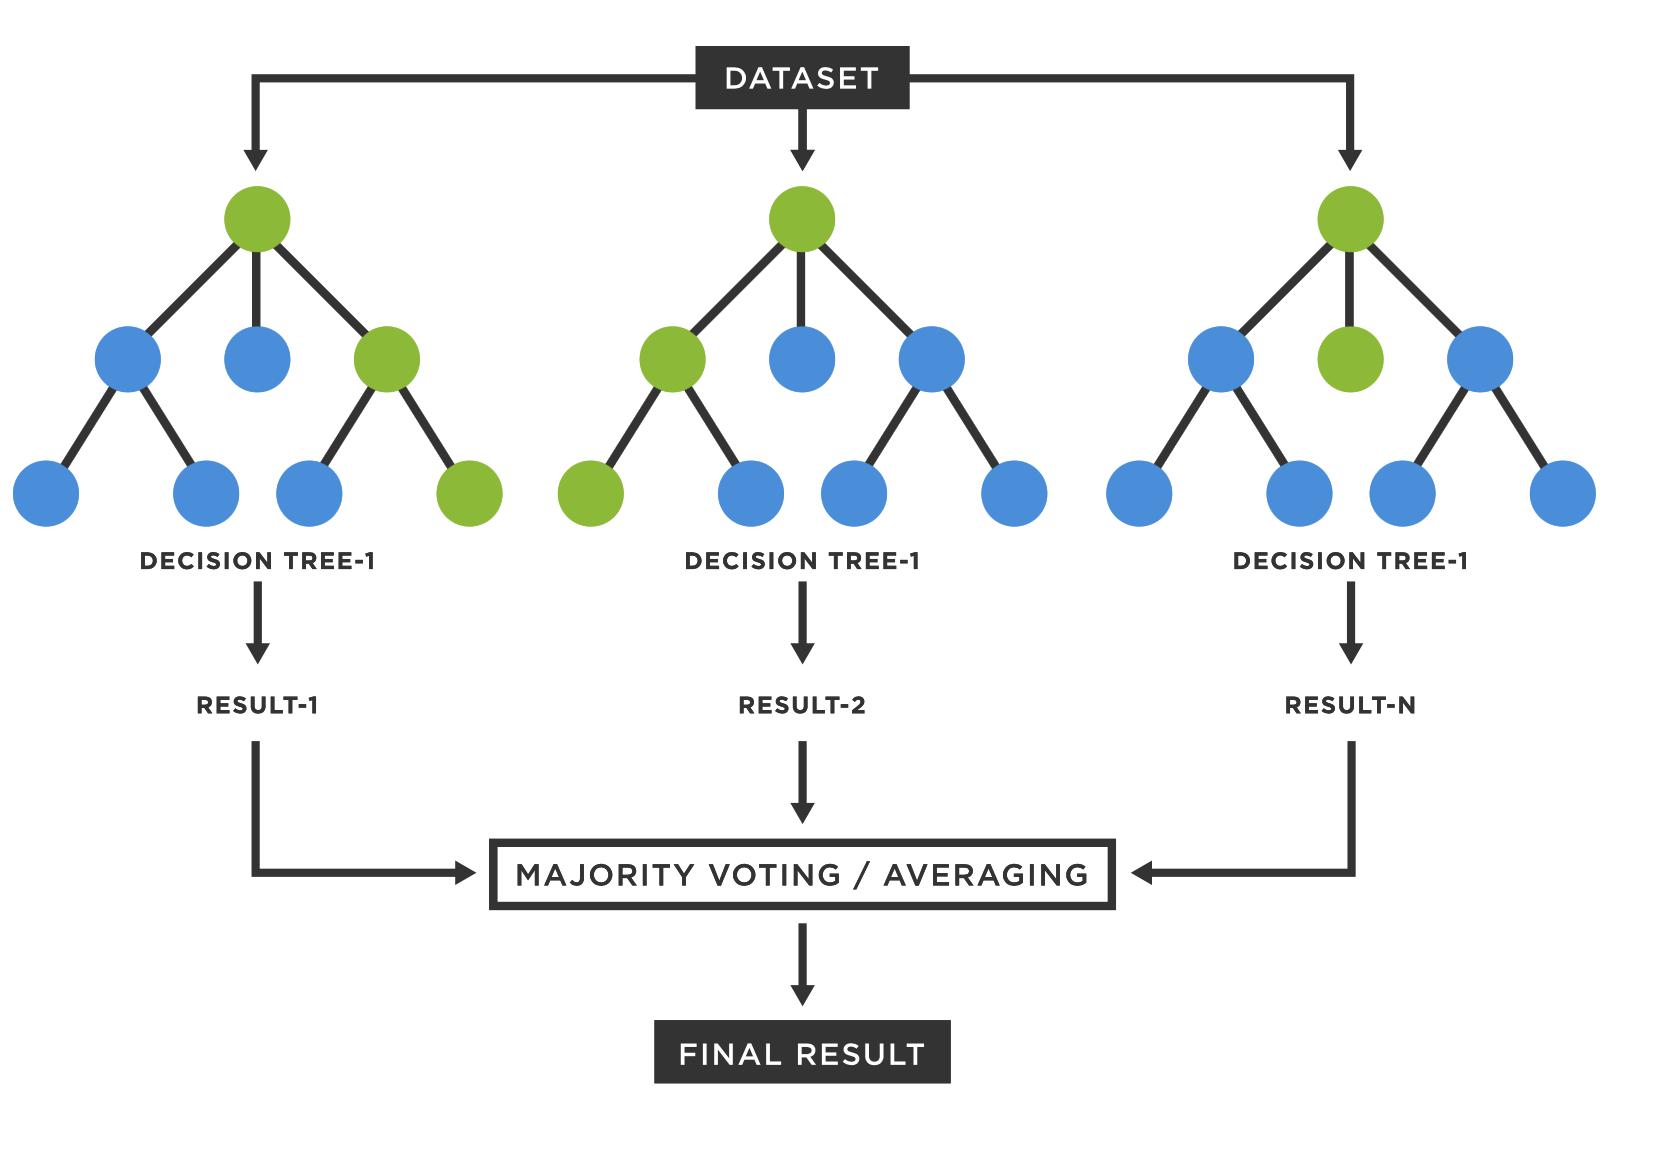

https://www.tibco.com/reference-center/what-is-a-random-forest

#### Naive Bayes

The Naive Bayes classifier is a probabilistic classification algorithm based on Bayes' theorem with the assumption of independence between the features. Because it makes computations simpler and the technique more computationally efficient, it is referred to as "naive". The basic idea behind the classifier is to calculate the probability of a data point belonging to a particular class, given its feature values. It does this by looking at the probability of each class occurring in the dataset and then calculating the probability of each feature value given the class. Then, it combines these to calculate the probability of each class and chooses the class with the highest probability as the predicted class for the data point.



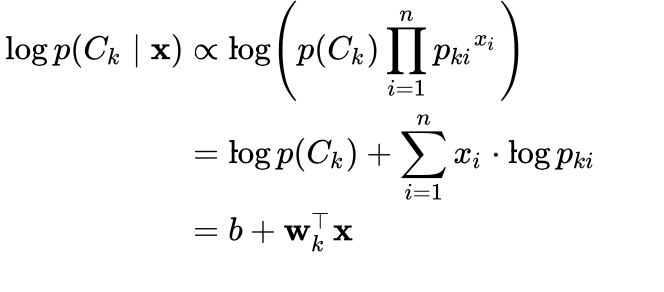

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

#### Support Vector Machines (SVM)

The idea behind SVM is to find a hyperplane that divides the data into different classes. SVM tries to maximize the margin between the closest data points of each class, known as support vectors, to determine the optimal hyperplane. In case of higher dimensions the hyperplane is determined by making use of a kernel function. The hyperparameters that need to be tuned are the parameters of the kernel function and the reguralisation parameter. Once the hyperplane is formed, the prediction is made on the basis of which side of the hyperplane the data point is on.

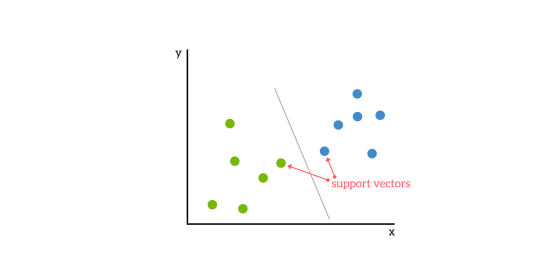

https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html

# Model Fitting

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import *
spark = SparkSession.builder.getOrCreate()
import seaborn as sns
import time

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd

bankData = pd.read_csv("bank-additional-full.csv",sep=';')
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The data is first taken into a pandas dataframe and then it will be passed into a Spark Dataframe

## EDA

In [4]:
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bankData['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [6]:
bankData['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

- `pdays` column doesn't add much value as the data within the column is mostly **999** with a few exceptions.
- `previous` column also has majority of 0's which means most of the customers are being contacted for the first time.

Assumption : I will be dropping the above columns since customers invest in financial instruments based on their return preferences and not based on how many times they have been contacted. 
- The assumption also prompts me to remove the `poutcome` column as well, which captures if they previously made an investment.

- Along with these the `duration` column will be dropped too since in the introduction and on the website it has been mentioned that this column needs to be dropped to build a reasonable predictable model (see above)

In [7]:
bankData.drop(['pdays','duration','previous','poutcome'],inplace= True,axis=1)

<AxesSubplot: >

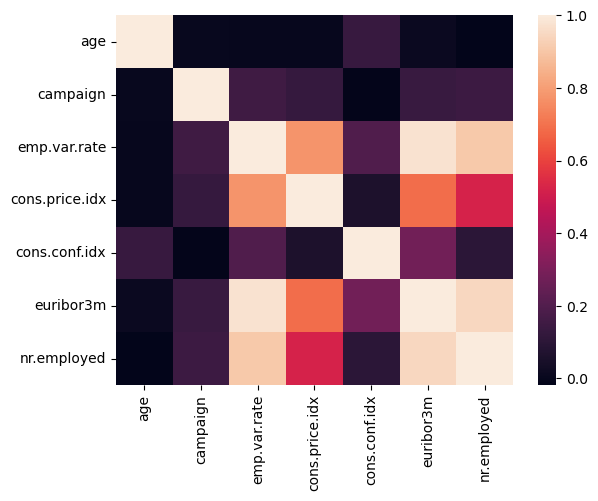

In [8]:
sns.heatmap(bankData.corr())

The `emp.var.rate` and `nr.employed` are actually correlated and the first function is actually a function of the second. Hence two variables are not required and i'll thus be dropping the second one i.e. `nr.employed`

In [9]:
bankData.drop("nr.employed",inplace= True,axis=1)

In [10]:
bankData['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

Since the contact is through a voice call, i'll be excluding the contact variable as well. Ideally if there were different modes of communication, let's say like email, mail or video etc. Then this should have been an important feature to keep.

In [11]:
bankData.drop("contact",inplace=True,axis=1)

The `day_of_week` variable will be also removed because of the initial assumption, however i'm retaining the month column, since there is always seasonality involved in the investment process.

In [12]:
bankData.drop("day_of_week",inplace=True,axis=1)

In [13]:
bankData.head()

,age,job,marital,education,default,housing,loan,month,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,may,1,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,may,1,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,may,1,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,may,1,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,may,1,1.1,93.994,-36.4,4.857,no


In [14]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y'],
      dtype='object')

In [15]:
bankData.rename(columns={'emp.var.rate':'emp','cons.price.idx':'cpi','cons.conf.idx':'confidx'},inplace= True)

## Pipeline

In [16]:
from pyspark.ml import *
from pyspark.ml.classification import *
from pyspark.ml.tuning import *
from pyspark.ml.evaluation import *

In [17]:
data = spark.createDataFrame(bankData)
data.show(5)

+---+---------+-------+-----------+-------+-------+----+-----+--------+---+------+-------+---------+---+
|age|      job|marital|  education|default|housing|loan|month|campaign|emp|   cpi|confidx|euribor3m|  y|
+---+---------+-------+-----------+-------+-------+----+-----+--------+---+------+-------+---------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|  may|       1|1.1|93.994|  -36.4|    4.857| no|
| 57| services|married|high.school|unknown|     no|  no|  may|       1|1.1|93.994|  -36.4|    4.857| no|
| 37| services|married|high.school|     no|    yes|  no|  may|       1|1.1|93.994|  -36.4|    4.857| no|
| 40|   admin.|married|   basic.6y|     no|     no|  no|  may|       1|1.1|93.994|  -36.4|    4.857| no|
| 56| services|married|high.school|     no|     no| yes|  may|       1|1.1|93.994|  -36.4|    4.857| no|
+---+---------+-------+-----------+-------+-------+----+-----+--------+---+------+-------+---------+---+
only showing top 5 rows



In [18]:
cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month','y']

This is the list of all the categorical variables, i intend to pass to `StringIndexer()` to convert them into numerical attributes

In [19]:
categorical_cols = {}
for x in cat_var:
    categorical_cols[x] = data.select(col(x)).distinct().count()
    
categorical_cols

{'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'month': 10,
 'y': 2}

In [20]:
cat_var_num = list(map(lambda x : x +"_numeric" , cat_var))

### Train Test Split

In [21]:
train, test = data.randomSplit([0.8,0.2])
print(train.count(), test.count())

32827 8361


In [22]:
indexer = StringIndexer(inputCols = [*cat_var], outputCols = [*cat_var_num])

In [23]:
sqlTrans = SQLTransformer(
    statement = """
                SELECT age, emp, cpi, confidx, euribor3m, job_numeric, education_numeric, housing_numeric, y_numeric as label FROM __THIS__
                """
)

In [24]:
encoder = OneHotEncoder(
    inputCols=["job_numeric", "education_numeric", "housing_numeric"],
    outputCols=["job_onehot", "education_onehot", "housing_onehot"]
)


In [25]:
assembler = VectorAssembler(inputCols = ["age", "emp", "cpi", "confidx", "euribor3m", "job_onehot", "education_onehot", "housing_onehot"], 
                            outputCol = "features",
                            handleInvalid = 'keep')

For all the models, I'll be using the following transformations. The `indexer` takes in the categorical variables which are stored in the **cat_var** and **cat_var_num**. The `sqlTrans` selects the required columns from the data, it also renames the y column as label, which is required to fit the pipeline model, then the `encoder` creates the dummy variables and then `assembler` is used to create the features column.

### General Idea for Model Fitting

The general idea for the the model fitting:
- I will be creating a paramGrid with required parameters
- Then I will be setting up pipeline, which contains the above transformers
- Then the cross validation model would be built and fitted to train data twice, once for accuracy, once for F1 score
- Then the best parameter model is chosen and then the metrics are calculated for the test data

### Logistic Regression

In [26]:
logreg = LogisticRegression()

In [27]:
paramGrid = ParamGridBuilder() \
    .addGrid(logreg.regParam, [0, 0.05, 0.1, 0.15]) \
    .addGrid(logreg.elasticNetParam, [0,0.33,0.67,1]) \
    .build()

In [28]:
pipeline = Pipeline(stages = [indexer, sqlTrans, encoder ,assembler, logreg])

In [29]:
start_time = time.time()
evaluator_acc = MulticlassClassificationEvaluator(metricName='accuracy')
crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator_acc,
                          numFolds=5)
cvModel = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 220.99 seconds


In [30]:
my_list = []
for i in range(len(paramGrid)):
    my_list.append([cvModel.avgMetrics[i], paramGrid[i].values()])
my_list

[[0.887725231741522, dict_values([0.0, 0.0])],
 [0.887725231741522, dict_values([0.0, 0.33])],
 [0.887725231741522, dict_values([0.0, 0.67])],
 [0.887725231741522, dict_values([0.0, 1.0])],
 [0.887380008358063, dict_values([0.05, 0.0])],
 [0.8875622113779386, dict_values([0.05, 0.33])],
 [0.8875622113779386, dict_values([0.05, 0.67])],
 [0.8875622113779386, dict_values([0.05, 1.0])],
 [0.8875622113779386, dict_values([0.1, 0.0])],
 [0.8875622113779386, dict_values([0.1, 0.33])],
 [0.8875622113779386, dict_values([0.1, 0.67])],
 [0.8875622113779386, dict_values([0.1, 1.0])],
 [0.8875622113779386, dict_values([0.15, 0.0])],
 [0.8875622113779386, dict_values([0.15, 0.33])],
 [0.8875622113779386, dict_values([0.15, 0.67])],
 [0.8875622113779386, dict_values([0.15, 1.0])]]

In [31]:
#evaluator_acc = MulticlassClassificationEvaluator(metricName='accuracy')
start_time = time.time()
evaluator_f1 = MulticlassClassificationEvaluator(metricName='f1')
crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator_f1,
                          numFolds=5)
cvModel = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 215.39 seconds


In [32]:
my_list = []
for i in range(len(paramGrid)):
    my_list.append([cvModel.avgMetrics[i], paramGrid[i].values()])
my_list

[[0.8528061756890976, dict_values([0.0, 0.0])],
 [0.8528061756890976, dict_values([0.0, 0.33])],
 [0.8528061756890976, dict_values([0.0, 0.67])],
 [0.8528061756890976, dict_values([0.0, 1.0])],
 [0.8346599352749802, dict_values([0.05, 0.0])],
 [0.8346925222442358, dict_values([0.05, 0.33])],
 [0.8346925222442358, dict_values([0.05, 0.67])],
 [0.8346925222442358, dict_values([0.05, 1.0])],
 [0.8346925222442358, dict_values([0.1, 0.0])],
 [0.8346925222442358, dict_values([0.1, 0.33])],
 [0.8346925222442358, dict_values([0.1, 0.67])],
 [0.8346925222442358, dict_values([0.1, 1.0])],
 [0.8346925222442358, dict_values([0.15, 0.0])],
 [0.8346925222442358, dict_values([0.15, 0.33])],
 [0.8346925222442358, dict_values([0.15, 0.67])],
 [0.8346925222442358, dict_values([0.15, 1.0])]]

Based on the above, the best scores are for Logistic Regression without any penalty. In fact is the same as long as `regParam` is 0. The same results are produced for LASSO too i.e. when the $\alpha$ =1 . 

In [33]:
F1_logreg_cl = MulticlassClassificationEvaluator(metricName='f1').evaluate(cvModel.transform(test))
print(F1_logreg_cl)

0.8518152050078869


In [34]:
accuracy_logreg_cl = MulticlassClassificationEvaluator(metricName='accuracy').evaluate(cvModel.transform(test))
print(accuracy_logreg_cl)

0.8875732567874656


### Classification Tree

In [35]:
dt_classifier = DecisionTreeClassifier()

In [36]:
paramGrid_dt = ParamGridBuilder() \
    .addGrid(dt_classifier.maxDepth, [3, 4, 5, 6,7]) \
    .addGrid(dt_classifier.minInstancesPerNode, [3,4,5,6,7]) \
    .build()

In [37]:
pipeline_dt = Pipeline(stages = [indexer,sqlTrans, encoder ,assembler, dt_classifier])

In [38]:

start_time = time.time()

crossval = CrossValidator(estimator = pipeline_dt,
                          estimatorParamMaps = paramGrid_dt,
                          evaluator = evaluator_acc,
                          numFolds=5)
cvModel_dt = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")


Time taken to run: 160.06 seconds


In [39]:
my_list = []
for i in range(len(paramGrid_dt)):
    my_list.append([cvModel_dt.avgMetrics[i], paramGrid_dt[i].values()])
my_list

[[0.8893757788134204, dict_values([3, 3])],
 [0.8893757788134204, dict_values([3, 4])],
 [0.8893757788134204, dict_values([3, 5])],
 [0.8893757788134204, dict_values([3, 6])],
 [0.8893757788134204, dict_values([3, 7])],
 [0.8899349693601826, dict_values([4, 3])],
 [0.8899349693601826, dict_values([4, 4])],
 [0.8899349693601826, dict_values([4, 5])],
 [0.8899349693601826, dict_values([4, 6])],
 [0.8899349693601826, dict_values([4, 7])],
 [0.8903283758805856, dict_values([5, 3])],
 [0.8901152437003648, dict_values([5, 4])],
 [0.8901152437003648, dict_values([5, 5])],
 [0.8901152437003648, dict_values([5, 6])],
 [0.8901152437003648, dict_values([5, 7])],
 [0.8893154708763988, dict_values([6, 3])],
 [0.889379110872771, dict_values([6, 4])],
 [0.8891961933229842, dict_values([6, 5])],
 [0.889196174738524, dict_values([6, 6])],
 [0.8891659012494719, dict_values([6, 7])],
 [0.8879102059225403, dict_values([7, 3])],
 [0.8886173715500758, dict_values([7, 4])],
 [0.8884642584922412, dict_values(

In [40]:
start_time = time.time()
crossval = CrossValidator(estimator = pipeline_dt,
                          estimatorParamMaps = paramGrid_dt,
                          evaluator = evaluator_f1,
                          numFolds=5)
cvModel_dt = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")


Time taken to run: 147.56 seconds


In [41]:
my_list = []
for i in range(len(paramGrid_dt)):
    my_list.append([cvModel_dt.avgMetrics[i], paramGrid_dt[i].values()])
my_list

[[0.8616665109719372, dict_values([3, 3])],
 [0.8616665109719372, dict_values([3, 4])],
 [0.8616665109719372, dict_values([3, 5])],
 [0.8616665109719372, dict_values([3, 6])],
 [0.8616665109719372, dict_values([3, 7])],
 [0.8632719668275977, dict_values([4, 3])],
 [0.8632719668275977, dict_values([4, 4])],
 [0.8632719668275977, dict_values([4, 5])],
 [0.8632719668275977, dict_values([4, 6])],
 [0.8632719668275977, dict_values([4, 7])],
 [0.8655822187456954, dict_values([5, 3])],
 [0.8655544760459175, dict_values([5, 4])],
 [0.8655544760459175, dict_values([5, 5])],
 [0.8655196662072864, dict_values([5, 6])],
 [0.8655544760459175, dict_values([5, 7])],
 [0.8629578058901481, dict_values([6, 3])],
 [0.8629331472468689, dict_values([6, 4])],
 [0.862835627569418, dict_values([6, 5])],
 [0.8628359201384402, dict_values([6, 6])],
 [0.8627804905002223, dict_values([6, 7])],
 [0.863572389656027, dict_values([7, 3])],
 [0.864262470344198, dict_values([7, 4])],
 [0.8642626798390578, dict_values([

In [42]:
F1_dt_cl = MulticlassClassificationEvaluator(metricName='f1').evaluate(cvModel_dt.transform(test))
print(F1_dt_cl)

0.8595873354878292


In [43]:
accuracy_dt_cl = MulticlassClassificationEvaluator(metricName='accuracy').evaluate(cvModel_dt.transform(test))
print(accuracy_dt_cl)

0.8869752421959096


### Random Forest Classifier

In [44]:
rf_classifier = RandomForestClassifier()

In [45]:
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf_classifier.maxDepth, [3,6,9]) \
    .addGrid(rf_classifier.minInstancesPerNode, [3,6,9]) \
    .addGrid(rf_classifier.numTrees,[100,150,200])\
    .build()

In [46]:
pipeline_rf = Pipeline(stages = [indexer,sqlTrans, encoder ,assembler, dt_classifier])

In [47]:

start_time = time.time()

crossval = CrossValidator(estimator = pipeline_rf,
                          estimatorParamMaps = paramGrid_rf,
                          evaluator = evaluator_acc,
                          numFolds=5)
cvModel_rf = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 154.29 seconds


In [48]:
my_list = []
for i in range(len(paramGrid_dt)):
    my_list.append([cvModel_rf.avgMetrics[i], paramGrid_rf[i].values()])
my_list

[[0.8906026075790408, dict_values([3, 3, 100])],
 [0.8906026075790408, dict_values([3, 3, 150])],
 [0.8906026075790408, dict_values([3, 3, 200])],
 [0.8906026075790408, dict_values([3, 6, 100])],
 [0.8906026075790408, dict_values([3, 6, 150])],
 [0.8906026075790408, dict_values([3, 6, 200])],
 [0.8906026075790408, dict_values([3, 9, 100])],
 [0.8906026075790408, dict_values([3, 9, 150])],
 [0.8906026075790408, dict_values([3, 9, 200])],
 [0.8906026075790408, dict_values([6, 3, 100])],
 [0.8906026075790408, dict_values([6, 3, 150])],
 [0.8906026075790408, dict_values([6, 3, 200])],
 [0.8906026075790408, dict_values([6, 6, 100])],
 [0.8906026075790408, dict_values([6, 6, 150])],
 [0.8906026075790408, dict_values([6, 6, 200])],
 [0.8906026075790408, dict_values([6, 9, 100])],
 [0.8906026075790408, dict_values([6, 9, 150])],
 [0.8906026075790408, dict_values([6, 9, 200])],
 [0.8906026075790408, dict_values([9, 3, 100])],
 [0.8906026075790408, dict_values([9, 3, 150])],
 [0.8906026075790408

In [49]:

start_time = time.time()

crossval = CrossValidator(estimator = pipeline_rf,
                          estimatorParamMaps = paramGrid_rf,
                          evaluator = evaluator_f1,
                          numFolds=5)
cvModel_rf = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 144.48 seconds


In [50]:
my_list = []
for i in range(len(paramGrid_dt)):
    my_list.append([cvModel_rf.avgMetrics[i], paramGrid_rf[i].values()])
my_list

[[0.865732564739832, dict_values([3, 3, 100])],
 [0.865732564739832, dict_values([3, 3, 150])],
 [0.865732564739832, dict_values([3, 3, 200])],
 [0.865732564739832, dict_values([3, 6, 100])],
 [0.865732564739832, dict_values([3, 6, 150])],
 [0.865732564739832, dict_values([3, 6, 200])],
 [0.865732564739832, dict_values([3, 9, 100])],
 [0.865732564739832, dict_values([3, 9, 150])],
 [0.865732564739832, dict_values([3, 9, 200])],
 [0.865732564739832, dict_values([6, 3, 100])],
 [0.865732564739832, dict_values([6, 3, 150])],
 [0.865732564739832, dict_values([6, 3, 200])],
 [0.865732564739832, dict_values([6, 6, 100])],
 [0.865732564739832, dict_values([6, 6, 150])],
 [0.865732564739832, dict_values([6, 6, 200])],
 [0.865732564739832, dict_values([6, 9, 100])],
 [0.865732564739832, dict_values([6, 9, 150])],
 [0.865732564739832, dict_values([6, 9, 200])],
 [0.865732564739832, dict_values([9, 3, 100])],
 [0.865732564739832, dict_values([9, 3, 150])],
 [0.865732564739832, dict_values([9, 3, 

In [51]:
F1_rf_cl = MulticlassClassificationEvaluator(metricName='f1').evaluate(cvModel_rf.transform(test))
print(F1_rf_cl)

0.8595873354878292


In [52]:
accuracy_rf_cl = MulticlassClassificationEvaluator(metricName='accuracy').evaluate(cvModel_rf.transform(test))
print(accuracy_rf_cl)

0.8869752421959096


### Naive Bayes

In [53]:
nb_classifier = NaiveBayes()

In [54]:
paramGrid_nb = ParamGridBuilder() \
    .addGrid(nb_classifier.smoothing, [0,0.5,0.75,1]) \
    .addGrid(nb_classifier.modelType, ["bernoulli","gaussian"]) \
    .build()

In [55]:
pipeline_nb = Pipeline(stages = [indexer,sqlTrans, encoder ,assembler, dt_classifier])

In [56]:
start_time = time.time()

crossval = CrossValidator(estimator = pipeline_nb,
                          estimatorParamMaps = paramGrid_nb,
                          evaluator = evaluator_acc,
                          numFolds=5)
cvModel_nb = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 44.32 seconds


In [57]:
my_list = []
for i in range(len(paramGrid_nb)):
    my_list.append([cvModel_nb.avgMetrics[i], paramGrid_nb[i].values()])
my_list

[[0.8906026075790408, dict_values([0.0, 'bernoulli'])],
 [0.8906026075790408, dict_values([0.0, 'gaussian'])],
 [0.8906026075790408, dict_values([0.5, 'bernoulli'])],
 [0.8906026075790408, dict_values([0.5, 'gaussian'])],
 [0.8906026075790408, dict_values([0.75, 'bernoulli'])],
 [0.8906026075790408, dict_values([0.75, 'gaussian'])],
 [0.8906026075790408, dict_values([1.0, 'bernoulli'])],
 [0.8906026075790408, dict_values([1.0, 'gaussian'])]]

In [58]:
start_time = time.time()

crossval = CrossValidator(estimator = pipeline_nb,
                          estimatorParamMaps = paramGrid_nb,
                          evaluator = evaluator_f1,
                          numFolds=5)
cvModel_nb = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 46.80 seconds


In [59]:
my_list = []
for i in range(len(paramGrid_nb)):
    my_list.append([cvModel_nb.avgMetrics[i], paramGrid_nb[i].values()])
my_list

[[0.865732564739832, dict_values([0.0, 'bernoulli'])],
 [0.865732564739832, dict_values([0.0, 'gaussian'])],
 [0.865732564739832, dict_values([0.5, 'bernoulli'])],
 [0.865732564739832, dict_values([0.5, 'gaussian'])],
 [0.865732564739832, dict_values([0.75, 'bernoulli'])],
 [0.865732564739832, dict_values([0.75, 'gaussian'])],
 [0.865732564739832, dict_values([1.0, 'bernoulli'])],
 [0.865732564739832, dict_values([1.0, 'gaussian'])]]

In [60]:
F1_nb_cl = MulticlassClassificationEvaluator(metricName='f1').evaluate(cvModel_nb.transform(test))
print(F1_rf_cl)

0.8595873354878292


In [61]:
accuracy_nb_cl = MulticlassClassificationEvaluator(metricName='accuracy').evaluate(cvModel_nb.transform(test))
print(accuracy_rf_cl)

0.8869752421959096


### SVM

In [62]:
svm_classifier = LinearSVC()

In [63]:
paramGrid_svm = ParamGridBuilder() \
    .addGrid(svm_classifier.regParam, [0,1,5,10,20,50]) \
    .addGrid(svm_classifier.maxIter, [10,100,150,200]) \
    .build()

In [64]:
pipeline_svm = Pipeline(stages = [indexer,sqlTrans, encoder ,assembler, dt_classifier])

In [65]:
start_time = time.time()

crossval = CrossValidator(estimator = pipeline_svm,
                          estimatorParamMaps = paramGrid_svm,
                          evaluator = evaluator_acc,
                          numFolds=5)
cvModel_svm = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 125.05 seconds


In [66]:
my_list = []
for i in range(len(paramGrid_svm)):
    my_list.append([cvModel_svm.avgMetrics[i], paramGrid_svm[i].values()])
my_list

[[0.8906026075790408, dict_values([0.0, 10])],
 [0.8906026075790408, dict_values([0.0, 100])],
 [0.8906026075790408, dict_values([0.0, 150])],
 [0.8906026075790408, dict_values([0.0, 200])],
 [0.8906026075790408, dict_values([1.0, 10])],
 [0.8906026075790408, dict_values([1.0, 100])],
 [0.8906026075790408, dict_values([1.0, 150])],
 [0.8906026075790408, dict_values([1.0, 200])],
 [0.8906026075790408, dict_values([5.0, 10])],
 [0.8906026075790408, dict_values([5.0, 100])],
 [0.8906026075790408, dict_values([5.0, 150])],
 [0.8906026075790408, dict_values([5.0, 200])],
 [0.8906026075790408, dict_values([10.0, 10])],
 [0.8906026075790408, dict_values([10.0, 100])],
 [0.8906026075790408, dict_values([10.0, 150])],
 [0.8906026075790408, dict_values([10.0, 200])],
 [0.8906026075790408, dict_values([20.0, 10])],
 [0.8906026075790408, dict_values([20.0, 100])],
 [0.8906026075790408, dict_values([20.0, 150])],
 [0.8906026075790408, dict_values([20.0, 200])],
 [0.8906026075790408, dict_values([50

In [67]:
start_time = time.time()

crossval = CrossValidator(estimator = pipeline_svm,
                          estimatorParamMaps = paramGrid_svm,
                          evaluator = evaluator_f1,
                          numFolds=5)
cvModel_svm = crossval.fit(train)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to run: {time_taken:.2f} seconds")

Time taken to run: 131.06 seconds


In [68]:
my_list = []
for i in range(len(paramGrid_svm)):
    my_list.append([cvModel_svm.avgMetrics[i], paramGrid_svm[i].values()])
my_list

[[0.865732564739832, dict_values([0.0, 10])],
 [0.865732564739832, dict_values([0.0, 100])],
 [0.865732564739832, dict_values([0.0, 150])],
 [0.865732564739832, dict_values([0.0, 200])],
 [0.865732564739832, dict_values([1.0, 10])],
 [0.865732564739832, dict_values([1.0, 100])],
 [0.865732564739832, dict_values([1.0, 150])],
 [0.865732564739832, dict_values([1.0, 200])],
 [0.865732564739832, dict_values([5.0, 10])],
 [0.865732564739832, dict_values([5.0, 100])],
 [0.865732564739832, dict_values([5.0, 150])],
 [0.865732564739832, dict_values([5.0, 200])],
 [0.865732564739832, dict_values([10.0, 10])],
 [0.865732564739832, dict_values([10.0, 100])],
 [0.865732564739832, dict_values([10.0, 150])],
 [0.865732564739832, dict_values([10.0, 200])],
 [0.865732564739832, dict_values([20.0, 10])],
 [0.865732564739832, dict_values([20.0, 100])],
 [0.865732564739832, dict_values([20.0, 150])],
 [0.865732564739832, dict_values([20.0, 200])],
 [0.865732564739832, dict_values([50.0, 10])],
 [0.865732

In [69]:
F1_svm_cl = MulticlassClassificationEvaluator(metricName='f1').evaluate(cvModel_svm.transform(test))
print(F1_svm_cl)

0.8595873354878292


In [70]:
accuracy_svm_cl = MulticlassClassificationEvaluator(metricName='accuracy').evaluate(cvModel_svm.transform(test))
print(accuracy_svm_cl)

0.8869752421959096


# Model Testing

In [71]:
Acc_dict = {}
F1_dict = {}

for i in ["svm","nb","rf","dt","logreg"]:
    F1_dict[i] = globals()['F1_' + i + '_cl']
    Acc_dict[i] = globals()['accuracy_' + i + '_cl']

In [72]:
Acc_dict

{'svm': 0.8869752421959096,
 'nb': 0.8869752421959096,
 'rf': 0.8869752421959096,
 'dt': 0.8869752421959096,
 'logreg': 0.8875732567874656}

In [73]:
F1_dict

{'svm': 0.8595873354878292,
 'nb': 0.8595873354878292,
 'rf': 0.8595873354878292,
 'dt': 0.8595873354878292,
 'logreg': 0.8518152050078869}

On the test set, Randon Forest, Naive Bayes, Decision Tree and SVM are all giving same results.

In [74]:
models = [[cvModel,"logreg"], [cvModel_dt,"Decision Tree"], [cvModel_nb,"Naive-Bayes"], [cvModel_rf,"RandomForest"], [cvModel_svm,"SVM"]]

for model in models:
    evaluator = BinaryClassificationEvaluator()
    metric = evaluator.evaluate(model[0].transform(test))
    print(model[1],":",metric)

logreg : 0.7596809235386807
Decision Tree : 0.5652902734551154
Naive-Bayes : 0.5652902734551154
RandomForest : 0.5652902734551154
SVM : 0.5652902734551154


On testing the data on AUCROC, Logistic Regression is giving out the best results. On Accuracy, and F1, the Other models are performing slightly better, but as per AUC-ROC, Logistic Regression is the best model. It is far better than the other models, which are just beating the random one marginally.